## 1. 강의자료 7장 66쪽에 나와있는 숫자 인식 프로그램을 수행한다. 일단 66쪽 프로그램 을 Jupyter notebook 으로 복사하여 실행시킨다. 프로그램에서는 수업시간에 설명한 바와 같이 to_categorical 함수의 도입 부분을 수정해야 한다.

### a. 오일석 교재 283쪽 프로그램을 참조하여 fit 함수 호출시 validation_data 부분을 추가하라.

In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split

from keras.datasets import mnist
from keras import models
from keras import layers

In [ ]:
# Loading the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
print(train_images.shape, train_labels.shape)

(60000, 28, 28) (60000,)


In [ ]:
train_images, valid_images, train_labels, valid_labels = \
    train_test_split(train_images, train_labels, test_size=0.1, shuffle=True)

In [ ]:
print(train_images.shape, train_labels.shape)

(54000, 28, 28) (54000,)


In [ ]:
print(valid_images.shape, valid_labels.shape)

(6000, 28, 28) (6000,)


In [ ]:
print(test_images.shape, test_labels.shape)

(10000, 28, 28) (10000,)


In [ ]:
# Network architecture
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

# Preparing image data
train_images = train_images.reshape((54000, 28 * 28))
train_images = train_images.astype('float32') / 255

valid_images = valid_images.reshape((6000, 28 * 28))
valid_images = valid_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

# Preparing the labels
from keras.utils import to_categorical
train_labels = to_categorical(train_labels)
valid_labels = to_categorical(valid_labels)
test_labels = to_categorical(test_labels)

In [ ]:
print(train_images.shape, train_labels.shape)
print(test_images.shape, test_labels.shape)
print(valid_images.shape, valid_labels.shape)

(54000, 784) (54000, 10)
(10000, 784) (10000, 10)
(6000, 784) (6000, 10)


In [ ]:
# The compilation step
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [ ]:
# Fit the model to data
history = network.fit(train_images, train_labels, epochs=5, batch_size=128, validation_data=(valid_images, valid_labels))

Epoch 1/5
422/422 [==============================] - 10s 17ms/step - loss: 0.2756 - accuracy: 0.9204 - val_loss: 0.1413 - val_accuracy: 0.9573
Epoch 2/5
422/422 [==============================] - 8s 20ms/step - loss: 0.1138 - accuracy: 0.9663 - val_loss: 0.1002 - val_accuracy: 0.9692
Epoch 3/5
422/422 [==============================] - 4s 8ms/step - loss: 0.0743 - accuracy: 0.9774 - val_loss: 0.0813 - val_accuracy: 0.9757
Epoch 4/5
422/422 [==============================] - 3s 8ms/step - loss: 0.0543 - accuracy: 0.9836 - val_loss: 0.0803 - val_accuracy: 0.9755
Epoch 5/5
422/422 [==============================] - 5s 11ms/step - loss: 0.0407 - accuracy: 0.9880 - val_loss: 0.0687 - val_accuracy: 0.9777


In [ ]:
network.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407050 (1.55 MB)
Trainable params: 407050 (1.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.0643 - accuracy: 0.9816


### b. 교재의 287쪽을 참고하여 다음과 같은 history graph를 생성하는 기능을 추가하
라.

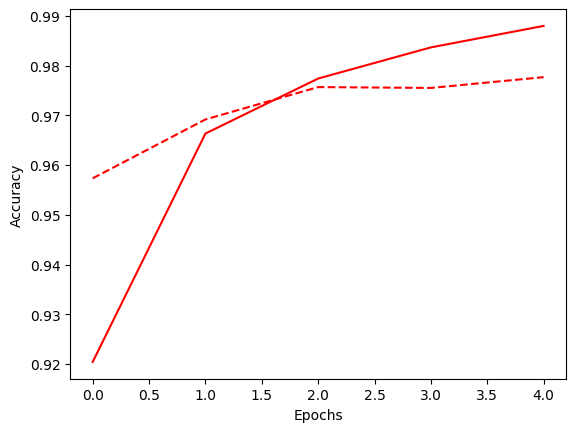

In [ ]:
import matplotlib.pyplot as plt

train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(0, len(train_acc))

# 정확도 그래프 그리기
plt.plot(epochs, train_acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'r--', label='Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.show()

### c. 프로그램에서 hidden 영역을 다음과 같이 수정한다. 첫번째 부분은 128개의 뉴런 으로 이루어지게 수정한다. 32개의 뉴런으로 구성된 두번째 부분을 추가한다. 출력부분은 원래대로 유지한다. 수정된 프로그램으로 history graph를 생성하는 결과를 구하라.

In [ ]:
# Network architecture
network = models.Sequential()
network.add(layers.Dense(128, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(32, activation='relu'))
network.add(layers.Dense(10, activation='softmax'))

In [ ]:
# The compilation step
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

# Preparing image data
train_images = train_images.reshape((54000, 28 * 28))
train_images = train_images.astype('float32') / 255

valid_images = valid_images.reshape((6000, 28 * 28))
valid_images = valid_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

# Preparing the labels
from keras.utils import to_categorical
train_labels = to_categorical(train_labels)
valid_labels = to_categorical(valid_labels)
test_labels = to_categorical(test_labels)

In [ ]:
print(train_images.shape, train_labels.shape)
print(test_images.shape, test_labels.shape)
print(valid_images.shape, valid_labels.shape)

(54000, 784) (54000, 10)
(10000, 784) (10000, 10)
(6000, 784) (6000, 10)


In [ ]:
# The compilation step
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [ ]:
# Fit the model to data
history = network.fit(train_images, train_labels, epochs=5, batch_size=128, validation_data=(valid_images, valid_labels))

Epoch 1/5
422/422 [==============================] - 3s 5ms/step - loss: 0.3592 - accuracy: 0.8987 - val_loss: 0.1970 - val_accuracy: 0.9433
Epoch 2/5
422/422 [==============================] - 2s 5ms/step - loss: 0.1511 - accuracy: 0.9557 - val_loss: 0.1371 - val_accuracy: 0.9565
Epoch 3/5
422/422 [==============================] - 4s 8ms/step - loss: 0.1065 - accuracy: 0.9684 - val_loss: 0.1335 - val_accuracy: 0.9595
Epoch 4/5
422/422 [==============================] - 2s 4ms/step - loss: 0.0819 - accuracy: 0.9753 - val_loss: 0.0975 - val_accuracy: 0.9700
Epoch 5/5
422/422 [==============================] - 2s 4ms/step - loss: 0.0659 - accuracy: 0.9800 - val_loss: 0.1051 - val_accuracy: 0.9672


In [ ]:
network.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dense_3 (Dense)             (None, 32)                4128      
                                                                 
 dense_4 (Dense)             (None, 10)                330       
                                                                 
Total params: 104938 (409.91 KB)
Trainable params: 104938 (409.91 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.0995 - accuracy: 0.9697


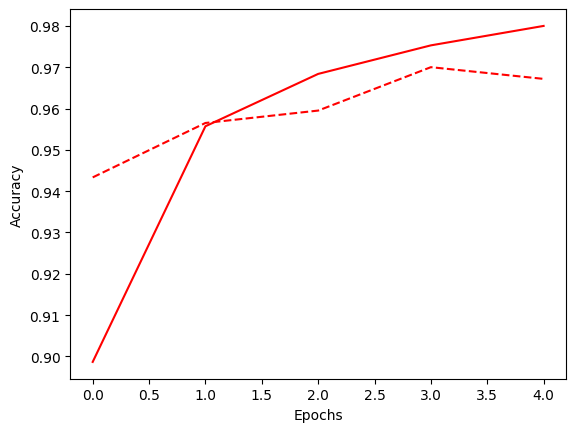

In [ ]:
import matplotlib.pyplot as plt

train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(0, len(train_acc))

# 정확도 그래프 그리기
plt.plot(epochs, train_acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'r--', label='Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.show()

## 2. 강의자료 8장 36~38쪽에 나와있는 Cifar-10 영상 인식 프로그램을 수행한다.
### 데이터 읽는 부분을 한번만 수행하도록 36쪽 부분을 먼저 실행시킨 다음, 뒷 부분을 수행시 키는 것이 좋다. 프로그램에서 epochs = 15로 변경하여 수행시킨다.

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import models
from keras import layers

# 관련 패키지
import numpy as np
import matplotlib.pyplot as plt

# 영상 파일 읽기
cifar10 = keras.datasets.cifar10

(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# 영상 데이터를 [0, 1] 범위로 바꾸기
train_images = train_images / 255.0
test_images = test_images / 255.0

170498071/170498071 [==============================] - 2s 0us/step


In [ ]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3,3), padding="SAME", activation='relu', input_shape=(32, 32, 3))) # input, hidden 1
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3,3), padding="SAME", activation='relu')) # hidden 2
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3,3), padding="SAME", activation='relu')) # hidden 3
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 파라미터 수 읽기
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 8, 8, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 64)          36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 4, 4, 64)         

In [ ]:
batch_size = 64
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
model.fit(train_images, train_labels,
          batch_size=batch_size,
          validation_split = 0.1,
          epochs=15,
          callbacks=[early_stop])

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

print('\n테스트 정확도:', test_acc)

Epoch 1/15
704/704 [==============================] - 94s 130ms/step - loss: 1.5683 - accuracy: 0.4309 - val_loss: 1.2505 - val_accuracy: 0.5588
Epoch 2/15
704/704 [==============================] - 90s 128ms/step - loss: 1.1688 - accuracy: 0.5851 - val_loss: 1.0638 - val_accuracy: 0.6262
Epoch 3/15
704/704 [==============================] - 87s 123ms/step - loss: 1.0062 - accuracy: 0.6465 - val_loss: 0.9343 - val_accuracy: 0.6706
Epoch 4/15
704/704 [==============================] - 87s 123ms/step - loss: 0.8965 - accuracy: 0.6861 - val_loss: 0.8825 - val_accuracy: 0.7024
Epoch 5/15
704/704 [==============================] - 87s 123ms/step - loss: 0.8126 - accuracy: 0.7168 - val_loss: 0.8249 - val_accuracy: 0.7248
Epoch 6/15
704/704 [==============================] - 94s 133ms/step - loss: 0.7574 - accuracy: 0.7372 - val_loss: 0.8413 - val_accuracy: 0.7068
Epoch 7/15
704/704 [==============================] - 86s 123ms/step - loss: 0.7011 - accuracy: 0.7546 - val_loss: 0.8143 - val_ac

###3. 문제 2의 프로그램을 다음과 같이 확장하여 프로그램을 구현하고 결과의 정확도를 측정하라. Hidden 1과 Hidden 3를 다음 그림과 같이 두 단계로 확장한다.
Convolution 을 반복 수행하고, max pooling은 두번째 단계에서만 수행

In [ ]:
from keras import models, layers

model = models.Sequential()

model.add(layers.Conv2D(32, (3,3), padding="SAME", activation='relu', input_shape=(32, 32, 3))) # input, hidden 1
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(32, (3,3), padding="SAME", activation='relu')) # hidden 2
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), padding="SAME", activation='relu')) # hidden 3
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), padding="SAME", activation='relu')) # hidden 4

# Flatten
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# 모델 컴파일
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 모델 구조 출력
model.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 16, 16, 32)        9248      
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 8, 8, 32)          0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 8, 8, 64)          18496     
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 4, 4, 64)         

In [ ]:
batch_size = 64
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
model.fit(train_images, train_labels,
          batch_size=batch_size,
          validation_split = 0.1,
          epochs=15,
          callbacks=[early_stop])

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

print('\n테스트 정확도:', test_acc)

Epoch 1/15
704/704 [==============================] - 73s 101ms/step - loss: 1.5957 - accuracy: 0.4148 - val_loss: 1.2840 - val_accuracy: 0.5360
Epoch 2/15
704/704 [==============================] - 73s 104ms/step - loss: 1.1949 - accuracy: 0.5728 - val_loss: 1.2260 - val_accuracy: 0.5660
Epoch 3/15
704/704 [==============================] - 70s 100ms/step - loss: 1.0274 - accuracy: 0.6361 - val_loss: 1.0063 - val_accuracy: 0.6484
Epoch 4/15
704/704 [==============================] - 72s 102ms/step - loss: 0.9067 - accuracy: 0.6787 - val_loss: 0.9053 - val_accuracy: 0.6812
Epoch 5/15
704/704 [==============================] - 70s 99ms/step - loss: 0.8223 - accuracy: 0.7124 - val_loss: 0.8713 - val_accuracy: 0.7000
Epoch 6/15
704/704 [==============================] - 69s 98ms/step - loss: 0.7594 - accuracy: 0.7348 - val_loss: 0.9086 - val_accuracy: 0.6908
Epoch 7/15
704/704 [==============================] - 70s 99ms/step - loss: 0.6907 - accuracy: 0.7585 - val_loss: 0.8243 - val_accur

In [ ]:
import matplotlib.pyplot as plt

train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(0, len(train_acc))

# 정확도 그래프 그리기
plt.plot(epochs, train_acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'r--', label='Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.show()